# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))


There are 13234 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


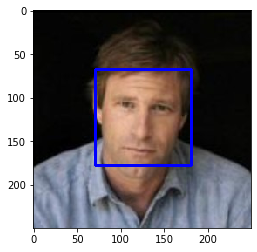

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
dog=0
human=0
for h in human_files_short:
    if(face_detector(h)):
        human+=1
for d in dog_files_short:
    if(face_detector(d)):
        dog+=1
print("human images with detected faces is- {}%".format(human))
print("dog images with detected faces is- {}%".format(dog))

human images with detected faces is- 96%
dog images with detected faces is- 18%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)
VGG16=VGG16.train(mode=False)

#check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    print("Running on CUDA")

Running on CUDA


In [6]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    transform=transforms.Compose([transforms.ToPILImage(),transforms.Resize((244,244)),transforms.ToTensor()])
    image=cv2.imread(img_path)
    img=transform(image)
    img=img[None,:]
    output=VGG16(img.cuda()).cpu().data.numpy()
    return np.argmax(output)


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    a=VGG16_predict(img_path)
    if(a<=268 and a>=151):
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
vgg_human=0
vgg_dog=0
for h in human_files_short:
    if(dog_detector(h)):
        vgg_human+=1
for d in dog_files_short:
    if(dog_detector(d)):
        vgg_dog+=1
print("human images with detected faces is- {}%".format(vgg_human))
print("dog images with detected faces is- {}%".format(vgg_dog))

human images with detected faces is- 0%
dog images with detected faces is- 89%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
import os
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
transform_train=transforms.Compose([transforms.Resize((224,224)),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.RandomRotation(10),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
transform=transforms.Compose([transforms.Resize((224,224)),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_data=datasets.ImageFolder("dogImages/train",transform_train)
test_data=datasets.ImageFolder("dogImages/test",transform)
valid_data=datasets.ImageFolder("dogImages/valid",transform)


In [3]:
train_loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(test_data,batch_size=32,shuffle=True)
valid_loader=DataLoader(valid_data,batch_size=32,shuffle=True)

In [4]:
loaders_scratch={"train":train_loader,"test":test_loader,"valid":valid_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
How does your code resize the images (by cropping, stretching, etc)? What size did you pick for the input tensor, and why?

In above code I have made different dataloader for train, validation and test data.
1. In all the dataset I  have given a tranforms object which resize the each image to 224x224x3. I have used this size because this is the standard size used in vggg16 network and also because I am getting good results with it. I have also tried to reduce the size  of image further but the accuracy was decreasing.
2. In all the datasets I  have also normalized each channel of all image with standard deviation and mean =0.5. This help in less computational complexity in our cnn.
3. Yes  I decided to augument the data. Augumentation is done to avoid overfitting and I have done this only to my train dataset. For augumentation I have use Random Horzontal  Flip and Random Rotion. These functions will rotate and flip the image randomly and provide generalization to our training data.




### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torch
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1=nn.Conv2d(3,8,3,padding=1)
        self.conv2=nn.Conv2d(8,16,3,padding=1)
        self.batchnorm1=nn.BatchNorm2d(16)
        self.conv3=nn.Conv2d(16,32,3,padding=1)
        self.batchnorm2=nn.BatchNorm2d(32)
        self.conv4=nn.Conv2d(32,64,3,padding=1)
        self.batchnorm3=nn.BatchNorm2d(64)
        self.conv5=nn.Conv2d(64,128,3,padding=1)
        self.batchnorm4=nn.BatchNorm2d(128)
        self.conv6=nn.Conv2d(128,256,3,padding=1)
        self.batchnorm5=nn.BatchNorm2d(256)
        self.pool=nn.MaxPool2d(2,2)
        self.fc1=nn.Linear(256*3*3,512)
        self.fc2=nn.Linear(512,256)
        self.fc3=nn.Linear(256,133)
        self.dropout=nn.Dropout(0.5)
      
    
    def forward(self, x):
        ## Define forward behavior
        x=self.pool(F.relu(self.conv1(x)))
   
        x=self.pool(F.relu(self.conv2(x)))
        x=self.batchnorm1(x)
        x=self.pool(F.relu(self.conv3(x)))
        x=self.batchnorm2(x)
        x=self.pool(F.relu(self.conv4(x)))
        x=self.batchnorm3(x)
        x=self.pool(F.relu(self.conv5(x)))
        x=self.batchnorm4(x)
        x=self.pool(F.relu(self.conv6(x)))
        x=self.batchnorm5(x)
        x=x.view(-1,256*3*3)
        x=self.dropout(x)
        x=F.relu(self.fc1(x))
        x=self.dropout(x)
        x=F.relu(self.fc2(x))
        x=self.dropout(x)
        x=F.relu(self.fc3(x))
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
1. In my convolutional network inmplementation i have used 6 convolutional layer and respective 6 max pool layers to extract the features of image and convert it into feature maps.
2. Approximately after every convolytional layer I have use Batch norm  of  nn module to normalize our extracted featurres map.
3. For the activation function for every convolutional  layer I have used "RElU" activation function.
4. As for my fully connnected layers I  have used 3 fully connected layers for the classification purpose.
5. I have used relu function for my fully connnected layers.
6. I have also used dropout layer with value 0.5 i.e 50% dropout of nodes after each fully connected layers.This done to generalize out model and avoid overfitting.
7. In my netork I have also provide padding in the convolutional network to extract the fetures at corner also.

Above are the minimum layers and its the minimum required architecture nedded to get the accuracy above 10%. Beacuse In starting I have started from 3 convolutional layers and 2 fully connected layers but the accuray was only 1%. and My model was getting stuck at local minima. This is beacause my network was not able to extract the propre features of the image so by adding more convolutional layers I was able to achieve it.
I have add one more fully connected layer just to increase accuracy.

Actually In this whole network the main parameter is learning rate which create problem for me the most. beacuse even after this network  i was not getting good accuracy as expected because my learning rate was too big. so i also  changed my learning rate to 0.0001
1st attempt: (3 convolutional layer and 2 fully connected layer)-accuracy 7% (with tuning of learning rate)
2nd attempt: (6 convolutional layer and 3 fully connected layer)-accuracy 18%
There not the the number of attempts but the most crucial attempts in implementing the network. the nuber of attempts are far more than i can remember. These other attempts actually involve the tuning of the network like little bit change in the hindden layer noder and other small changes.

Note:
Below I have show the number of epochs for that time when validation loss is less than training loss because after that validation loss start to increase. Actually I have trained my model upto 100 epochs but in the final running of the project I have reduced the epochs because from the previous training of the model I knew when the validation loss stops to decrease further more.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [9]:
import torch.optim as optim
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.Adam(model_scratch.parameters(),lr=0.0001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [10]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np
def train(n_epochs, loaders,use_cuda, model, optimizer, criterion, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU  
            if use_cuda:
                data, target = data.cuda(), target.cuda()  
            optimizer.zero_grad()
            output=model.forward(data)
            loss=criterion(output,target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            del data
            del target
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output=model.forward(data)
            loss=criterion(output,target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            del data
            del target
         
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    return model    

# train the model
model_scratch = train(35, loaders_scratch,use_cuda, model_scratch, optimizer_scratch, 
                      criterion_scratch, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.886223 	Validation Loss: 4.875097
Validation loss decreased (inf --> 4.875097).  Saving model ...
Epoch: 2 	Training Loss: 4.853517 	Validation Loss: 4.835012
Validation loss decreased (4.875097 --> 4.835012).  Saving model ...
Epoch: 3 	Training Loss: 4.798572 	Validation Loss: 4.796712
Validation loss decreased (4.835012 --> 4.796712).  Saving model ...
Epoch: 4 	Training Loss: 4.740837 	Validation Loss: 4.743235
Validation loss decreased (4.796712 --> 4.743235).  Saving model ...
Epoch: 5 	Training Loss: 4.698383 	Validation Loss: 4.707268
Validation loss decreased (4.743235 --> 4.707268).  Saving model ...
Epoch: 6 	Training Loss: 4.657776 	Validation Loss: 4.673944
Validation loss decreased (4.707268 --> 4.673944).  Saving model ...
Epoch: 7 	Training Loss: 4.617067 	Validation Loss: 4.639539
Validation loss decreased (4.673944 --> 4.639539).  Saving model ...
Epoch: 8 	Training Loss: 4.569420 	Validation Loss: 4.590269
Validation loss decreased (4.63953

In [11]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [13]:
import numpy as np
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        del data
        del target
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.907543


Test Accuracy: 18% (157/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [6]:
import os
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
transform_train=transforms.Compose([transforms.Resize((224,224)),
                                   transforms.RandomHorizontalFlip(),
                                   transforms.RandomRotation(10),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
transform=transforms.Compose([transforms.Resize((224,224)),
                             transforms.ToTensor(),
                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_data=datasets.ImageFolder("dogImages/train",transform_train)
test_data=datasets.ImageFolder("dogImages/test",transform)
valid_data=datasets.ImageFolder("dogImages/valid",transform)
train_loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(test_data,batch_size=32,shuffle=True)
valid_loader=DataLoader(valid_data,batch_size=32,shuffle=True)
loaders_transfer={"train":train_loader,"test":test_loader,"valid":valid_loader}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [16]:
import torchvision.models as models
import torch.nn as nn
model_transfer = models.vgg16(pretrained=True)

In [11]:
for param in model_transfer.features.parameters():
    param.requires_grad=False

In [12]:
model_transfer.classifier[6]=nn.Linear(4096,133,bias=True)

In [8]:
import torch

In [17]:
use_cuda=torch.cuda.is_available()

In [19]:
if use_cuda:
    model_transfer = model_transfer.cuda()
    print("Running on cuda")

Running on cuda


In [5]:
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

In this implementation I have used VGG16 model for transfer learning implementation as the model trained on the dataset Imagenet with thousand different classes and as seen above from the dog detector result perform well on detecting the dog.
Actually in this implementation I have got the result in one go .
In VGG19 model I just changed the last layer  i.e. the fully connected layer according to the to the number of classes i.e. 133 classes.
I have freezed all the convolution layer weights as only fully connected layer will take part in trainig and as we see from dog detector code this VGG16 network is quite good in extractiing feature of the dog image.
from the lecture I have use Case 1 i.e small data and similar data.

Note:
Below I have show the number of epochs for that time when validation loss is less than training loss because after that 
validation loss start to increase. Actually I have trained my model upto 100 epochs but in the final running of the project I 
have reduced the epochs because from the previous training of the model I knew when the validation loss stops to decrease
further more.




### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [17]:
import torch.nn as nn
import torch.optim as optim
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(),lr=0.0001)



### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np
def train(n_epochs, loaders, model, optimizer, criterion,use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            
            if use_cuda:
                data, target = data.cuda(), target.cuda()  
            optimizer.zero_grad()
            output=model(data)
            loss=criterion(output,target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            del data
            del target
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output=model(data)
            loss=criterion(output,target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            del data
            del target

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    return model    

In [7]:
# train the model
n_epochs=8
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 2.107489 	Validation Loss: 1.184634
Validation loss decreased (inf --> 1.184634).  Saving model ...
Epoch: 2 	Training Loss: 0.888072 	Validation Loss: 0.947949
Validation loss decreased (1.184634 --> 0.947949).  Saving model ...
Epoch: 3 	Training Loss: 0.653700 	Validation Loss: 0.958108
Epoch: 4 	Training Loss: 0.487137 	Validation Loss: 0.878524
Validation loss decreased (0.947949 --> 0.878524).  Saving model ...
Epoch: 5 	Training Loss: 0.400122 	Validation Loss: 0.871329
Validation loss decreased (0.878524 --> 0.871329).  Saving model ...
Epoch: 6 	Training Loss: 0.340041 	Validation Loss: 0.850671
Validation loss decreased (0.871329 --> 0.850671).  Saving model ...
Epoch: 7 	Training Loss: 0.292281 	Validation Loss: 0.909506
Epoch: 8 	Training Loss: 0.253663 	Validation Loss: 0.923367


In [13]:
#load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        del data
        del target
  
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.717903


Test Accuracy: 78% (658/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [23]:
data_transfer={"train":train_data,"test":test_data,"valid":valid_data}

In [45]:
import cv2
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
transform=transforms.Compose([transforms.ToPILImage(),transforms.Resize((224,224)),transforms.ToTensor()])
def predict_breed_transfer(img_path):
    image=cv2.imread(img_path)
    image=transform(image)
    image=image[None,:]
    index=model_transfer(image.cuda()).data.max(1, keepdim=True)[1]
    return class_names[index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [55]:
import matplotlib.pyplot as plt


In [92]:
def run_app(img_path,a):
    image=cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    a.imshow(image)
    if(dog_detector(img_path)):
        a.title.set_text("dog breed is "+predict_breed_transfer(img_path))
      
    elif(face_detector(img_path)):
        a.title.set_text("You look like a "+predict_breed_transfer(img_path))
     
    else:
        a.title.set_text("neither dog face or human")
      
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output of the network is good as expected. But it can be better.
1. First I have not trained the convolutional layer which are acting as feature extractor, So if I have trained that aslo my weights will get further fine tuned which can give me more better results.
2. Increasing the number of fully connected layers can also help in increasing the accuracy.
3. Instead of using the VGG16 if i have used any oter architeture maybe my accuary can be improved.
4. Further filtering and generalization of dataset can also give me better result.
5. probably using  filterng techniques in my algorithm using opencv2 library.

lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
lfw\Aaron_Guiel\Aaron_Guiel_0001.jpg
dogImages\test\005.Alaskan_malamute\Alaskan_malamute_00360.jpg
dogImages\test\005.Alaskan_malamute\Alaskan_malamute_00362.jpg
dogImages\test\005.Alaskan_malamute\Alaskan_malamute_00375.jpg
dogImages\test\005.Alaskan_malamute\Alaskan_malamute_00383.jpg
dogImages\test\005.Alaskan_malamute\Alaskan_malamute_00386.jpg
dogImages\test\005.Alaskan_malamute\Alaskan_malamute_00387.jpg


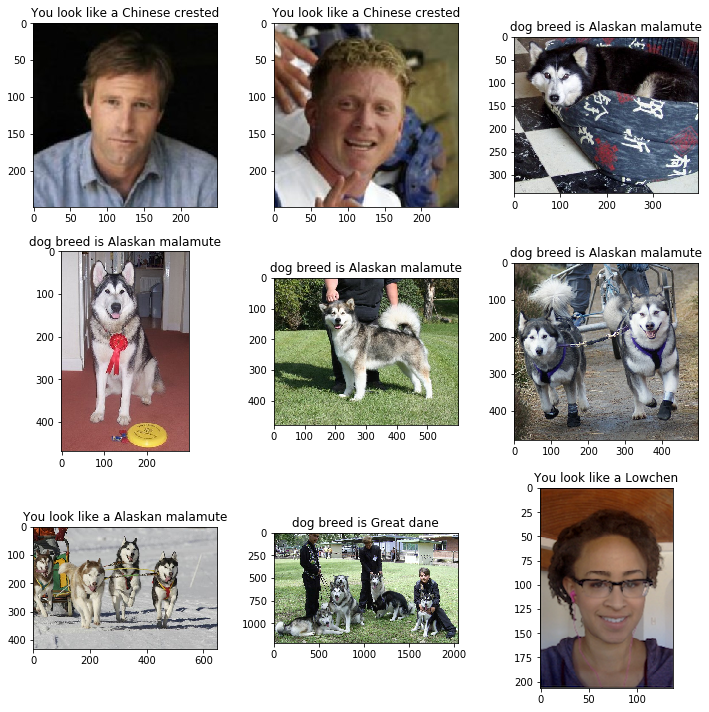

In [107]:
## suggested code, below
fig=plt.figure(figsize=(10,10),tight_layout=True)

for i,file in enumerate(np.hstack((human_files[:2], dog_files[34:40]))):
    print(file)
    run_app(file,fig.add_subplot((int)("33"+(str)(i+1))))
run_app("lfw\Aaron_Eckhart\Aaron_Eckhart_0002.jpg",fig.add_subplot((int)("33"+(str)(9))))    
    
